In [1]:
import pandas
table = pandas.read_csv("inpatientCharges.csv")

In [2]:
def clean_inpatient_data(df):
    # Preparing a dict with old columns as keys, with new columns as values
    old_cols = df.columns.values
    new_cols = {}
    for i in range(len(old_cols)):
        new_cols[old_cols[i]] = old_cols[i].strip().replace(' ', '_').lower()
    # Renaming all columns names via pandas rename() function
    df = df.rename(columns=new_cols)
    
    # Parsing financial values as floats
    df['average_covered_charges'] = df['average_covered_charges'].str[1:].astype(float)
    df['average_total_payments'] = df['average_total_payments'].str[1:].astype(float)
    df['average_medicare_payments'] = df['average_medicare_payments'].str[1:].astype(float)

    return df

# Cleaned dataframe
cleaned_impatient_df = clean_inpatient_data(table)

In [3]:
table.columns.values

array(['DRG Definition', 'Provider Id', 'Provider Name',
       'Provider Street Address', 'Provider City', 'Provider State',
       'Provider Zip Code', 'Hospital Referral Region Description',
       ' Total Discharges ', ' Average Covered Charges ',
       ' Average Total Payments ', 'Average Medicare Payments'],
      dtype=object)

In [4]:
#create new file with cleaned data
cleaned_impatient_df.to_csv('inpatient_charges_cleaned.csv', index=False)

In [5]:
new_table = cleaned_impatient_df.loc[cleaned_impatient_df['provider_state'] == 'FL']


In [6]:
new_table1 = cleaned_impatient_df.loc[(cleaned_impatient_df['drg_definition'] == '039 - EXTRACRANIAL PROCEDURES W/O CC/MCC') & (cleaned_impatient_df['provider_state'] == 'NY')]

In [7]:
#Get column names
column_names = cleaned_impatient_df.columns


In [8]:
# check if the column is unique
for i in column_names:
  print('{} is unique: {}'.format(i, cleaned_impatient_df[i].is_unique))

drg_definition is unique: False
provider_id is unique: False
provider_name is unique: False
provider_street_address is unique: False
provider_city is unique: False
provider_state is unique: False
provider_zip_code is unique: False
hospital_referral_region_description is unique: False
total_discharges is unique: False
average_covered_charges is unique: False
average_total_payments is unique: False
average_medicare_payments is unique: False


In [9]:
# Check the index values
cleaned_impatient_df.index.values

array([     0,      1,      2, ..., 163062, 163063, 163064])

In [10]:
# Check if a certain index exists
1632 in cleaned_impatient_df.index.values
# If index does not exist
test = lambda cleaned_impatient_df, x: cleaned_impatient_df.index(x) if x in cleaned_impatient_df else None

In [11]:
# Drop any rows which have any nans
cleaned_impatient_df.dropna()

,drg_definition,provider_id,provider_name,provider_street_address,provider_city,provider_state,provider_zip_code,hospital_referral_region_description,total_discharges,average_covered_charges,average_total_payments,average_medicare_payments
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07,5777.24,4763.73
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85,5787.57,4976.71
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,37560.37,5434.95,4453.79
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,13998.28,5417.56,4129.16
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,31633.27,5658.33,4851.44
...,...,...,...,...,...,...,...,...,...,...,...,...
163060,948 - SIGNS & SYMPTOMS W/O MCC,670041,SETON MEDICAL CENTER WILLIAMSON,201 SETON PARKWAY,ROUND ROCK,TX,78664,TX - Austin,23,26314.39,3806.86,3071.39
163061,948 - SIGNS & SYMPTOMS W/O MCC,670055,METHODIST STONE OAK HOSPITAL,1139 E SONTERRA BLVD,SAN ANTONIO,TX,78258,TX - San Antonio,11,21704.72,4027.36,2649.72
163062,948 - SIGNS & SYMPTOMS W/O MCC,670056,SETON MEDICAL CENTER HAYS,6001 KYLE PKWY,KYLE,TX,78640,TX - Austin,19,39121.73,5704.36,4058.36
163063,948 - SIGNS & SYMPTOMS W/O MCC,670060,TEXAS REGIONAL MEDICAL CENTER AT SUNNYVALE,231 SOUTH COLLINS ROAD,SUNNYVALE,TX,75182,TX - Dallas,11,28873.09,7663.09,6848.54


In [12]:
# Only drop columns which have at least 90% non-NaNs
cleaned_impatient_df.dropna(thresh=int(cleaned_impatient_df.shape[0] * .9), axis=1)

,drg_definition,provider_id,provider_name,provider_street_address,provider_city,provider_state,provider_zip_code,hospital_referral_region_description,total_discharges,average_covered_charges,average_total_payments,average_medicare_payments
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07,5777.24,4763.73
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85,5787.57,4976.71
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,37560.37,5434.95,4453.79
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,13998.28,5417.56,4129.16
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,31633.27,5658.33,4851.44
...,...,...,...,...,...,...,...,...,...,...,...,...
163060,948 - SIGNS & SYMPTOMS W/O MCC,670041,SETON MEDICAL CENTER WILLIAMSON,201 SETON PARKWAY,ROUND ROCK,TX,78664,TX - Austin,23,26314.39,3806.86,3071.39
163061,948 - SIGNS & SYMPTOMS W/O MCC,670055,METHODIST STONE OAK HOSPITAL,1139 E SONTERRA BLVD,SAN ANTONIO,TX,78258,TX - San Antonio,11,21704.72,4027.36,2649.72
163062,948 - SIGNS & SYMPTOMS W/O MCC,670056,SETON MEDICAL CENTER HAYS,6001 KYLE PKWY,KYLE,TX,78640,TX - Austin,19,39121.73,5704.36,4058.36
163063,948 - SIGNS & SYMPTOMS W/O MCC,670060,TEXAS REGIONAL MEDICAL CENTER AT SUNNYVALE,231 SOUTH COLLINS ROAD,SUNNYVALE,TX,75182,TX - Dallas,11,28873.09,7663.09,6848.54


In [13]:
cleaned_impatient_df.drop_duplicates(keep=False,inplace=True)

In [14]:
table_df = cleaned_impatient_df['average_covered_charges'].hist(bins=50) # Distribution analysis 
table_df

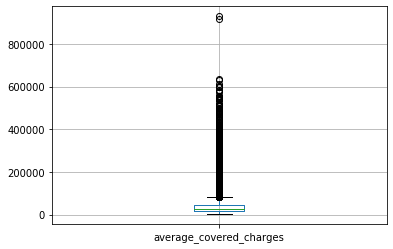

In [15]:
table_df = cleaned_impatient_df.boxplot(column='average_covered_charges') #boxplot : This confirms the presence of a lot of outliers/extreme values
table_df

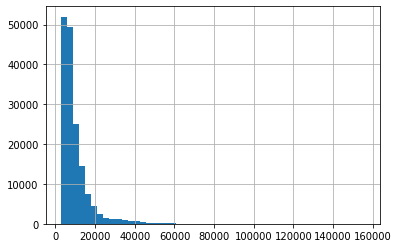

In [16]:
table_df = cleaned_impatient_df['average_total_payments'].hist(bins=50)
table_df

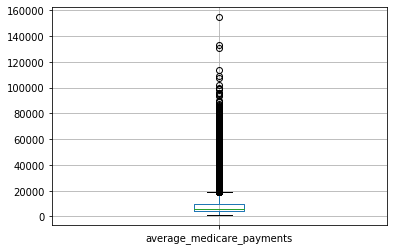

In [17]:
table_df = cleaned_impatient_df.boxplot(column='average_medicare_payments')
table_df

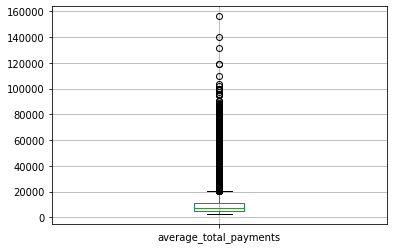

In [18]:
table_df = cleaned_impatient_df.boxplot(column='average_total_payments')
table_df

In [19]:
# checking the missing values in the dataset 
cleaned_impatient_df.apply(lambda x: sum(x.isnull()),axis=0) 

drg_definition                          0
provider_id                             0
provider_name                           0
provider_street_address                 0
provider_city                           0
provider_state                          0
provider_zip_code                       0
hospital_referral_region_description    0
total_discharges                        0
average_covered_charges                 0
average_total_payments                  0
average_medicare_payments               0
dtype: int64

In [20]:
table.columns = [column.strip() for column in table.columns]

In [25]:
cleaned_impatient_df['drg_definition'].unique().shape
cleaned_impatient_df['provider_id'].unique().shape
cleaned_impatient_df['provider_city'].unique().shape

(1977,)

In [29]:
cleaned_impatient_df.columns = [column.strip() for column in cleaned_impatient_df.columns]

In [31]:
for column in ['average_covered_charges', 'average_total_payments', 'average_medicare_payments']:
    cleaned_impatient_df[column] = cleaned_impatient_df[column].map(lambda x: x[1:])
    cleaned_impatient_df[column] = pandas.to_numeric(cleaned_impatient_df[column])

TypeError: 'float' object is not subscriptable